In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from yellowbrick.regressor import PredictionError, ManualAlphaSelection
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import ElasticNetCV

In [31]:
df = pd.read_csv("Advertising.csv")

In [32]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

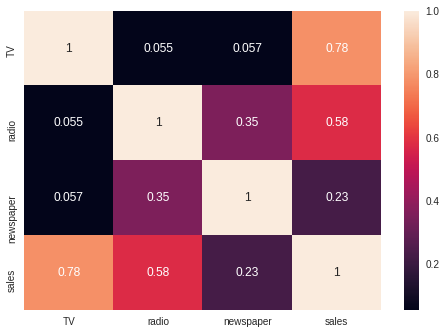

In [35]:
sns.heatmap(df.corr(), annot=True)

In [36]:
X = df.drop(["sales"], axis=1)

In [37]:
y = df.sales

In [38]:
scaler = StandardScaler()

In [39]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler.fit(X_train)

StandardScaler()

In [42]:
X_train = scaler.transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
lasso_model = Lasso()

In [45]:
lasso_model.fit(X_train, y_train)

Lasso()

In [46]:
y_pred = lasso_model.predict(X_test)

In [47]:
eval_metrics(y_test, y_pred)

r2_score: 0.8179966490329236 
 mae: 1.8549283137675237 
 mse: 5.744679831063471 
 rmse: 2.3968061730276546


In [48]:
accuracies = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)

In [49]:
accuracies.mean()

0.7416571484274538

In [50]:
alpha_space = np.linspace(0.1, 20, 100)

In [51]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=10).fit(X_train, y_train)

In [52]:
lasso_cv_model.alpha_


0.1

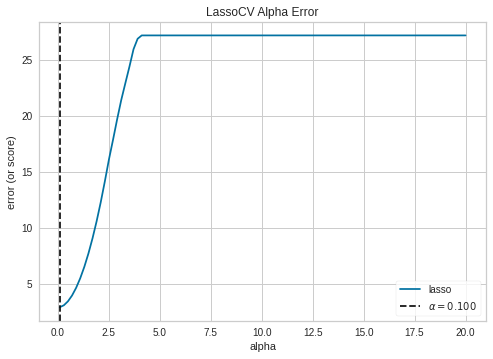

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [53]:
model_yellowbrick = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model_yellowbrick)
visualizer.fit(X_train, y_train)
visualizer.show()

In [54]:
# Let's try our model with the optimal alpha value from yellowbrick.

lasso_model_0_1 = Lasso(0.01).fit(X_train, y_train)
y_pred_0_1 = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred_0_1)

r2_score: 0.8179966490329236 
 mae: 1.8549283137675237 
 mse: 5.744679831063471 
 rmse: 2.3968061730276546


In [55]:
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.1, .5, .7, .9, .95, .99, 1])


In [56]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [57]:
y_pred_elastic = elastic_model.predict(X_test)

In [58]:
eval_metrics(y_test, y_pred_elastic)

r2_score: 0.8983361384489736 
 mae: 1.4612734376961354 
 mse: 3.2088768250528417 
 rmse: 1.791333811731594
